In [ ]:
# Importing the libaries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import time
import matplotlib.pyplot as plt

In [ ]:
# The data is preprocessed in excel
# Reading preprocessed file
df = pd.read_csv('./preprocessed_data.csv')

In [ ]:
df.dtypes

age                           int64
workclass                    object
fnlwgt                        int64
education                    object
education-num                 int64
marital-status               object
occupation                   object
relationship                 object
race                         object
sex                          object
capital-gain                  int64
capital-loss                  int64
hours-per-week                int64
native-country               object
income                       object
final_income                  int64
sex_pre_processed             int64
state_gov_preprocessed        int64
self_emp_imc_preprocessed     int64
private_preprocessed          int64
fedral_gov_preprocessed       int64
local_gov_preprocessed        int64
without_pay_preprocessed      int64
never_worked_preprocessed     int64
dtype: object

In [ ]:
# Droping the unnecessary columns
df2 = df.drop(['education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income', 'workclass'], axis=1)

In [ ]:
df2.dtypes

age                          int64
fnlwgt                       int64
education-num                int64
capital-gain                 int64
capital-loss                 int64
hours-per-week               int64
final_income                 int64
sex_pre_processed            int64
state_gov_preprocessed       int64
self_emp_imc_preprocessed    int64
private_preprocessed         int64
fedral_gov_preprocessed      int64
local_gov_preprocessed       int64
without_pay_preprocessed     int64
never_worked_preprocessed    int64
dtype: object

In [ ]:
X = df2.drop('final_income', axis = 'columns')
y = df2['final_income']

In [ ]:
X_data = X.values
y_data = y.values

In [ ]:
# Code for data centring and scaling
X_mean = np.mean(X_data)
X_std = np.std(X_data)
X_centered = X_data - X_mean
X_scaled = X_centered / X_std

In [ ]:
# PCA
X_transpose = np.transpose(X_scaled)
X_transpose_X = np.dot(X_transpose, X_scaled)
eigenvalues, eigenvectors = np.linalg.eig(X_transpose_X)

# Sorting thr eigenvalues
eigenvectors = eigenvectors.T
idxs = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[idxs]

In [ ]:
# Get the dimentional reduced data
def get_pca_transformation(no_of_components, eigenvectors, X):
  components_vector = eigenvectors[0 : no_of_components]
  scores = np.dot(X, components_vector.T)
  return scores

# Decission Tree Classification
def perform_decission_tree_classification(X_train, X_test, y_train, y_test):
  clf = DecisionTreeClassifier()
  # Checking the time for both training and testing
  train_start_time = time.time()
  clf.fit(X_train, y_train)
  train_end_time = time.time()
  test_start_time = time.time()
  y_pred_dt = clf.predict(X_test)
  test_end_time = time.time()
  train_time_dt = train_end_time - train_start_time
  test_time_dt = test_end_time - test_start_time
  # Getting the accuracy score
  accuracy = accuracy_score(y_test, y_pred_dt)
  return accuracy, y_pred_dt, train_time_dt, test_time_dt

# KNN classification
def perform_KNN_classification(X_train, X_test, y_train, y_test):
  knn_classifier = KNeighborsClassifier(n_neighbors=5)
  # Checking the time for both training and testing
  train_start_time = time.time()
  knn_classifier.fit(X_train, y_train)
  train_end_time = time.time()
  test_start_time = time.time()
  y_pred_knn = knn_classifier.predict(X_test)
  test_end_time = time.time()
  # Getting the accuracy score
  accuracy = accuracy_score(y_test, y_pred_knn)
  train_time_knn = train_end_time - train_start_time
  test_time_knn = test_end_time - test_start_time
  return accuracy, y_pred_knn, train_time_knn, test_time_knn

# Function to print confusion matrix
def print_confusion_matrix(y_test, y_pred, component):
  cm_dt = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(6, 4))
  sns.heatmap(cm_dt, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted Negative', 'Predicted Positive'],yticklabels=['Actual Negative', 'Actual Positive'])
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title(f"Confusion Matrix {component}")
  plt.show()


# To construct the experiment with PCA and Decission Tree classifier
def perform_PCA_with_decision_tree(no_of_components, accuracy_for_DT, train_time_DT, test_time_DT):
  print("========== Decision Tree ==========")
  for component in no_of_components:
    # PCA ptransofmation of the data
    PCA_transformed_data = get_pca_transformation(component, eigenvectors, X_scaled)
    # Spliting the data between train and test, here 40% data is used for testing
    X_train, X_test, y_train, y_test = train_test_split(PCA_transformed_data, y_data, test_size=0.4, random_state=42)
    accuracy, y_pred_dt, train_time_dt, test_time_dt = perform_decission_tree_classification(X_train, X_test, y_train, y_test)
    accuracy_for_DT.append(accuracy)
    train_time_DT.append(train_time_dt)
    test_time_DT.append(test_time_dt)
    print_confusion_matrix(y_test, y_pred_dt, component)
  print("========== Decision Tree Ends ==========")
  return accuracy_for_DT, train_time_DT, test_time_DT

# To construct the experiment with PCA and KNN classifier
def perform_PCA_with_KNN(no_of_components, accuracy_for_KNN, train_time_KNN, test_time_KNN):
  print("========== KNN ==========")
  for component in no_of_components:
    # PCA ptransofmation of the data
    PCA_transformed_data = get_pca_transformation(component, eigenvectors, X_scaled)
    # Spliting the data between train and test, here 40% data is used for testing
    X_train, X_test, y_train, y_test = train_test_split(PCA_transformed_data, y_data, test_size=0.4, random_state=42)
    accuracy, y_pred_knn, train_time_knn, test_time_knn = perform_KNN_classification(X_train, X_test, y_train, y_test)
    accuracy_for_KNN.append(accuracy)
    train_time_KNN.append(train_time_knn)
    test_time_KNN.append(test_time_knn)
    print_confusion_matrix(y_test, y_pred_knn, component)
  print("========== KNN Ends ==========")
  return accuracy_for_KNN, train_time_KNN, test_time_KNN

========== Decision Tree ==========


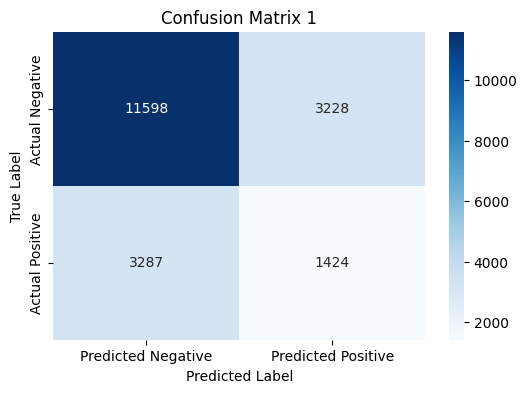

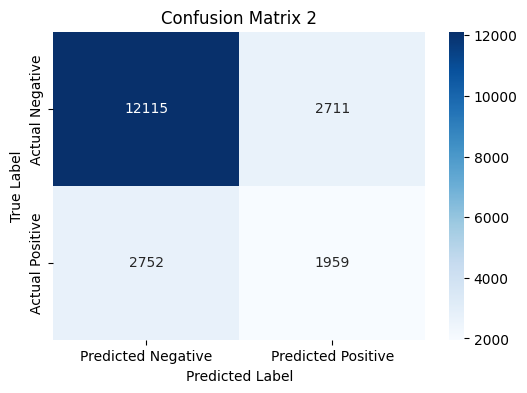

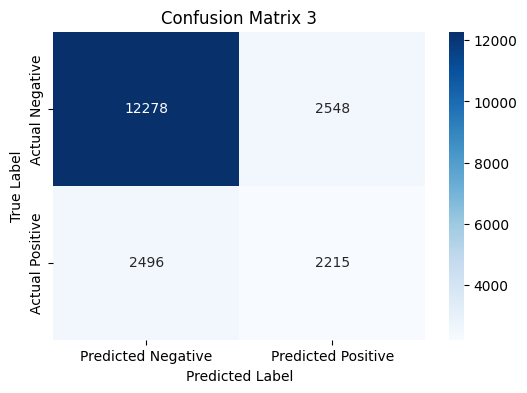

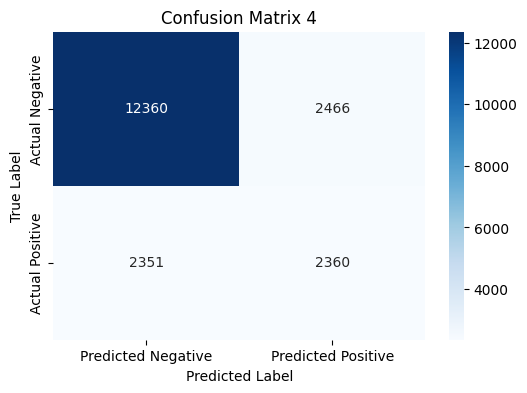

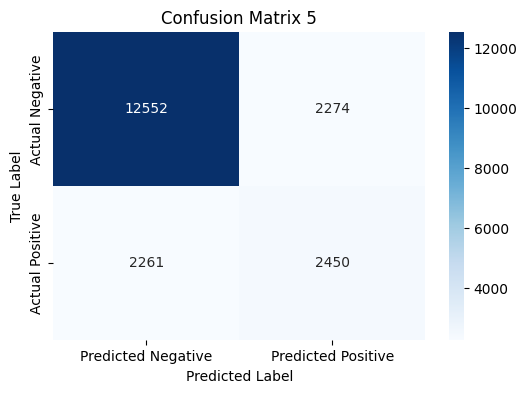

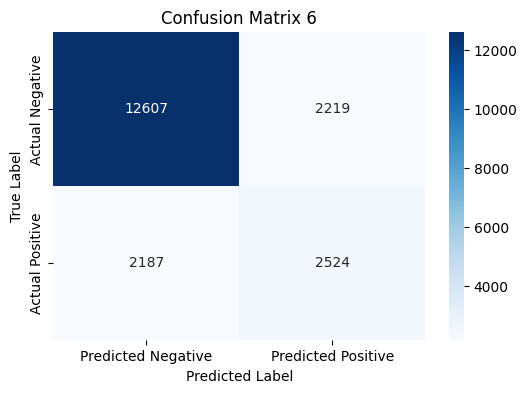

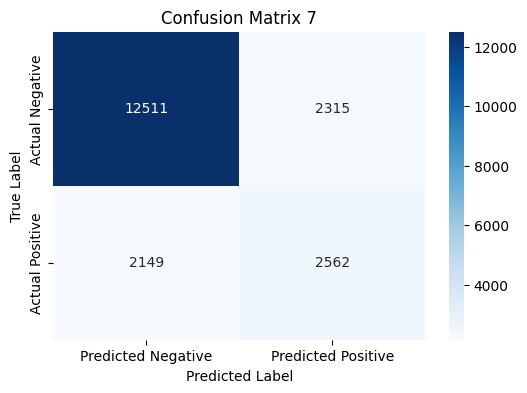

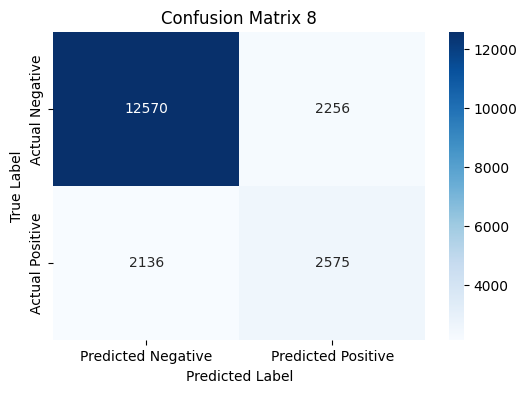

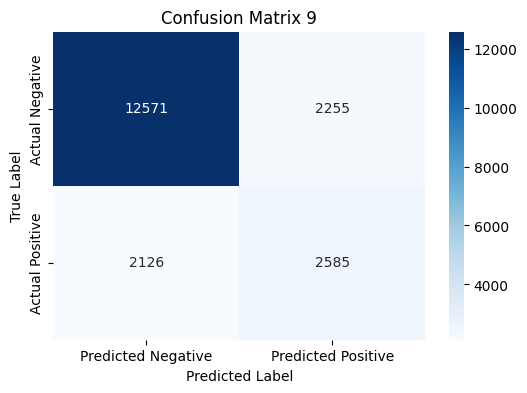

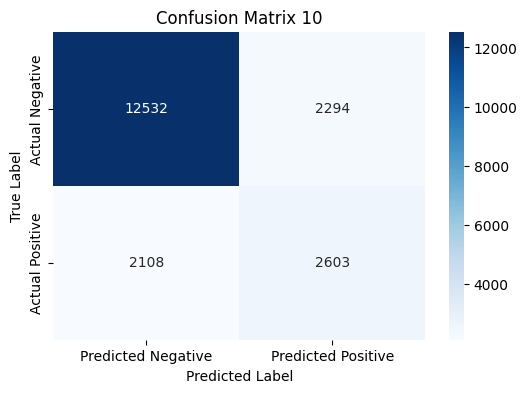

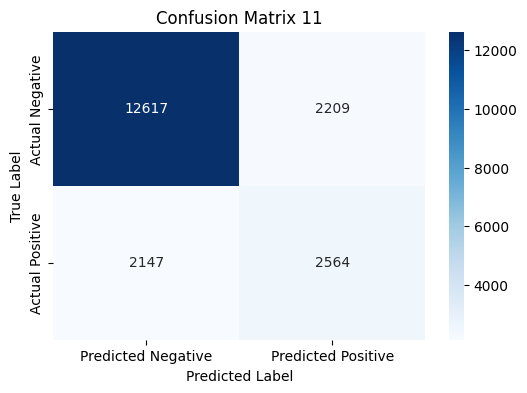

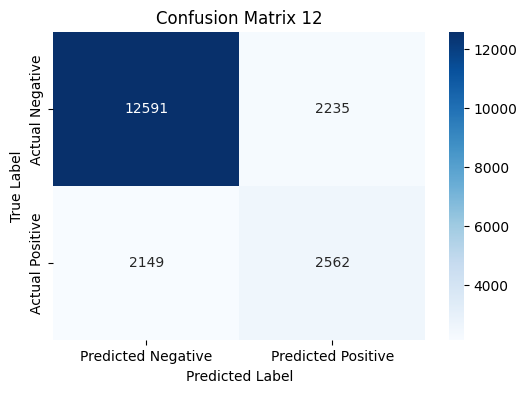

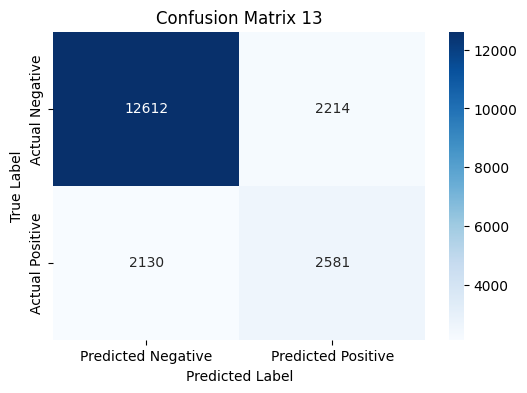

========== Decision Tree Ends ==========


In [ ]:
# Check different dimention reduecd scores
no_of_components = [1,2,3,4,5,6,7,8,9,10,11,12,13]
accuracy_for_DT, train_time_DT, test_time_DT = perform_PCA_with_decision_tree(no_of_components, [], [], [])

========== KNN ==========


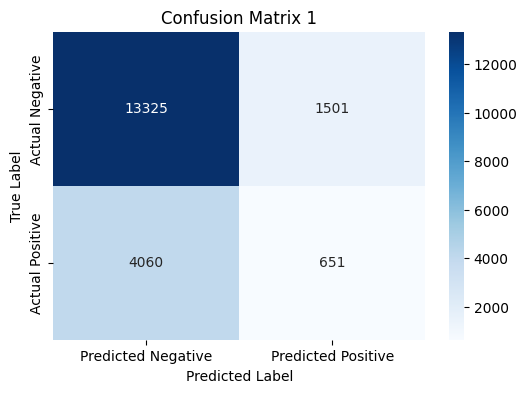

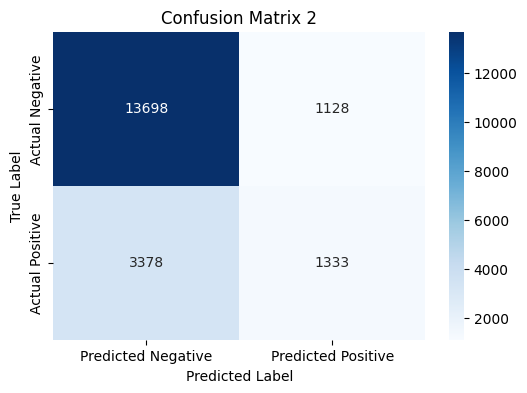

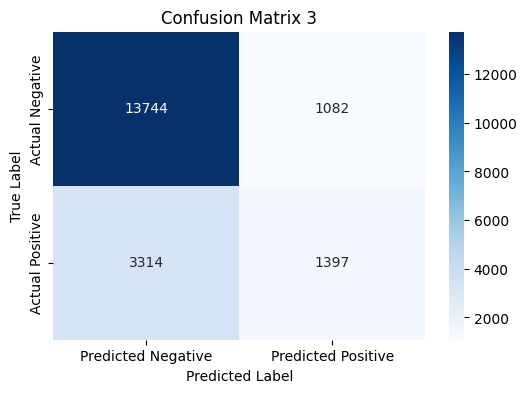

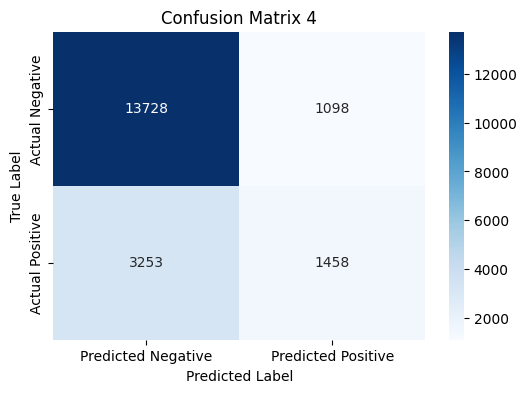

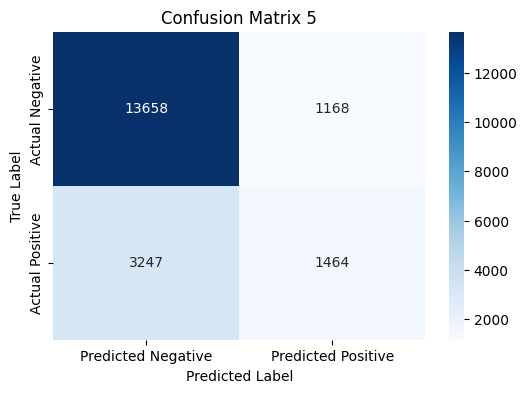

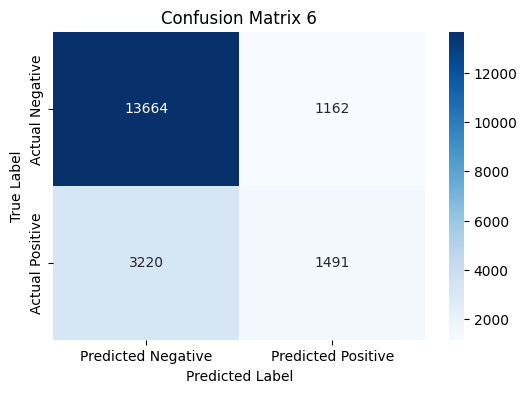

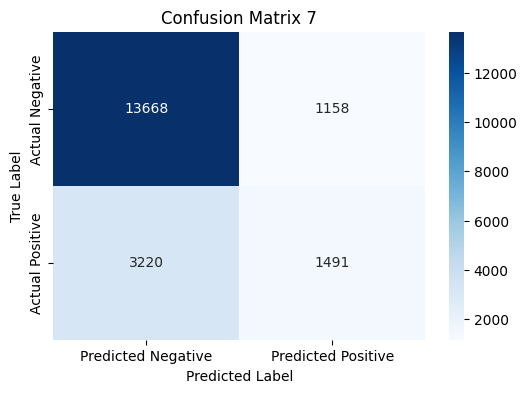

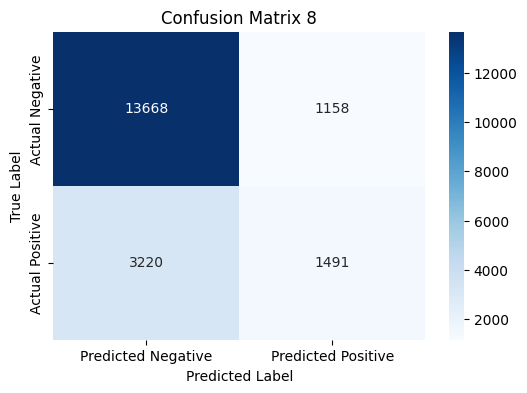

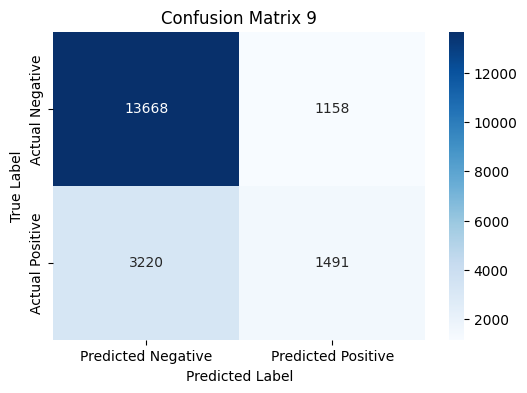

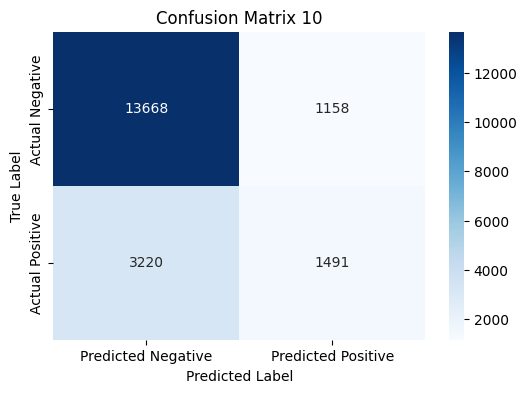

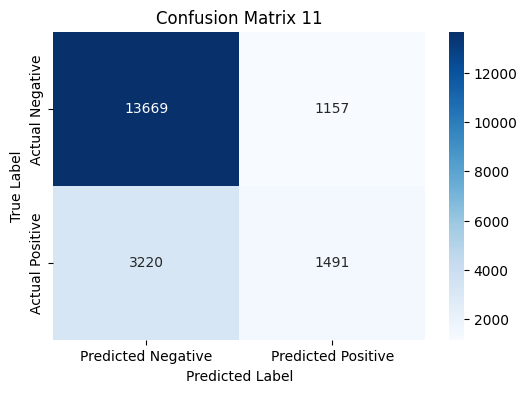

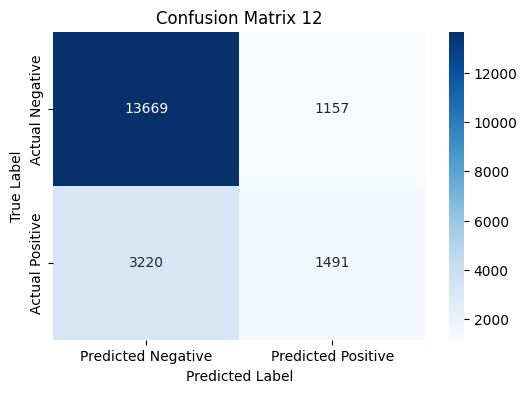

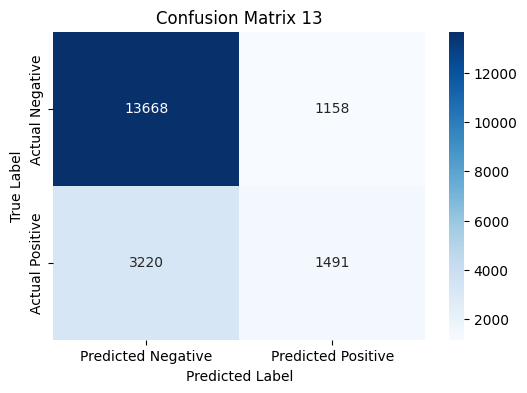

========== KNN Ends ==========


In [ ]:
accuracy_for_KNN, train_time_KNN, test_time_KNN = perform_PCA_with_KNN(no_of_components, [], [], [])

========== Analysis For PCA ==========


<Figure size 800x600 with 0 Axes>

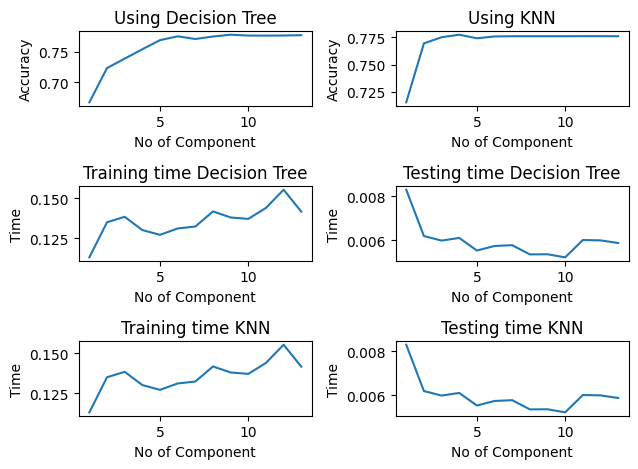

In [ ]:
# Ploting all the graphs for PCA analysis
print("========== Analysis For PCA ==========")
plt.figure(figsize=(8,6))
fig, axs = plt.subplots(3, 2)

axs[0, 0].plot(no_of_components, accuracy_for_DT)
axs[0, 0].set_xlabel("No of Component")
axs[0, 0].set_ylabel("Accuracy")
axs[0, 0].set_title("Using Decision Tree")

axs[0, 1].plot(no_of_components, accuracy_for_KNN)
axs[0, 1].set_xlabel("No of Component")
axs[0, 1].set_ylabel("Accuracy")
axs[0, 1].set_title("Using KNN")

axs[1, 0].plot(no_of_components, train_time_DT)
axs[1, 0].set_xlabel("No of Component")
axs[1, 0].set_ylabel("Time")
axs[1, 0].set_title("Training time Decision Tree")

axs[1, 1].plot(no_of_components, test_time_DT)
axs[1, 1].set_xlabel("No of Component")
axs[1, 1].set_ylabel("Time")
axs[1, 1].set_title("Testing time Decision Tree")

axs[2, 0].plot(no_of_components, train_time_KNN)
axs[2, 0].set_xlabel("No of Component")
axs[2, 0].set_ylabel("Time")
axs[2, 0].set_title("Training time KNN")

axs[2, 1].plot(no_of_components, test_time_KNN)
axs[2, 1].set_xlabel("No of Component")
axs[2, 1].set_ylabel("Time")
axs[2, 1].set_title("Testing time KNN")

plt.tight_layout()
plt.show()

In [ ]:
# Implementing forward pass
def forward_pass_with_DT(FP_train_time_DT, FP_test_time_DT):
  features = [1,2,3,4,5,6,7,8,9,10,11,12,13]
  # Spliting the data between train and test, here 40% data is used for testing
  X_train_fp, X_test_fp, y_train_fp, y_test_fp = train_test_split(X_scaled, y_data, test_size=0.4, random_state=42)
  selected_features_DT = []
  performance_DT = []
  for i in features:
    print("Step for featurs", i)
    # Performing the decission tree classification on the feature reduced data
    accuracy, y_pred_dt, train_time_dt, test_time_dt = perform_decission_tree_classification(X_train_fp[:, features[: i+1]], X_test_fp[:, features[: i + 1]], y_train_fp, y_test_fp)
    print("accuracy is", accuracy)
    selected_features_DT.append(i)
    performance_DT.append(accuracy)
    FP_train_time_DT.append(train_time_dt)
    FP_test_time_DT.append(test_time_dt)
    print_confusion_matrix(y_test_fp, y_pred_dt, i)
  return selected_features_DT, performance_DT, FP_train_time_DT, FP_test_time_DT

def forward_pass_with_knn(FP_train_time_KNN, FP_test_time_KNN):
  features = [1,2,3,4,5,6,7,8,9,10,11,12,13]
  # Spliting the data between train and test, here 40% data is used for testing
  X_train_fp, X_test_fp, y_train_fp, y_test_fp = train_test_split(X_scaled, y_data, test_size=0.4, random_state=42)
  selected_features_KNN = []
  performance_KNN = []
  for i in features:
    print("Step for featurs", i)
    # Performing the KNN on the feature reduced data
    accuracy, y_pred_knn, train_time_knn, test_time_knn = perform_KNN_classification(X_train_fp[:, features[: i+1]], X_test_fp[:, features[: i + 1]], y_train_fp, y_test_fp)
    print("accuracy is", accuracy)
    selected_features_KNN.append(i)
    performance_KNN.append(accuracy)
    FP_train_time_KNN.append(train_time_knn)
    FP_test_time_KNN.append(test_time_knn)
    print_confusion_matrix(y_test_fp, y_pred_knn, i)
  return selected_features_KNN, performance_KNN, FP_train_time_KNN, FP_test_time_KNN

========== DT Starts ==========
Step for featurs 1
accuracy is 0.7073245636484619


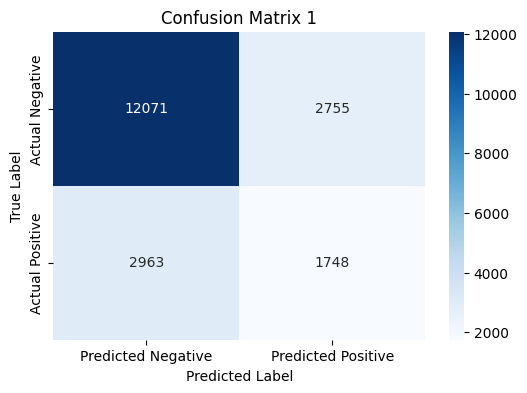

Step for featurs 2
accuracy is 0.7489379126785074


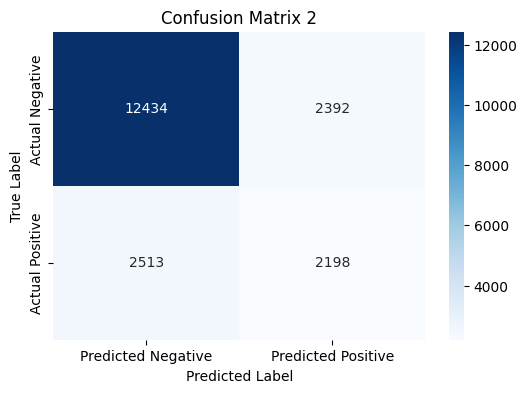

Step for featurs 3
accuracy is 0.7659824947535445


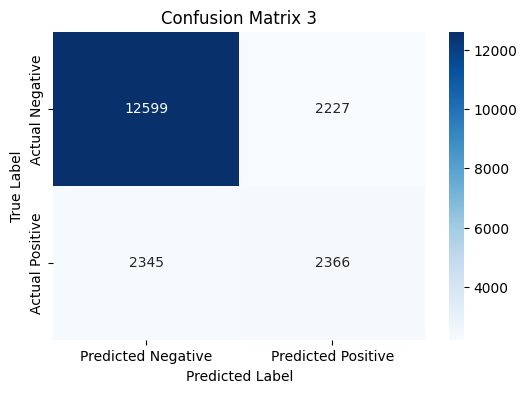

Step for featurs 4
accuracy is 0.7629113988841685


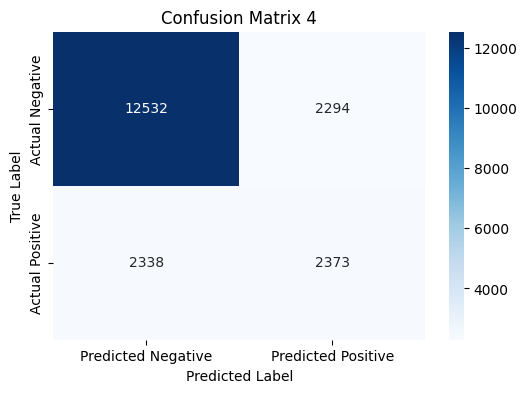

Step for featurs 5
accuracy is 0.7703843988329836


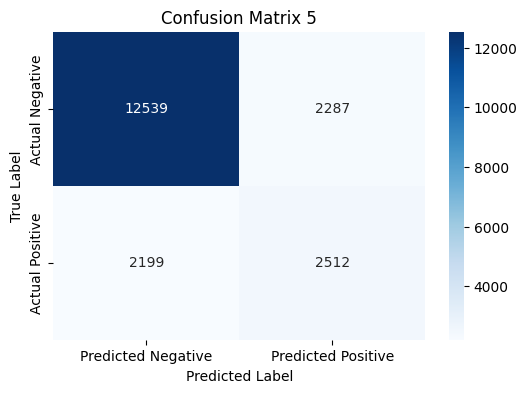

Step for featurs 6
accuracy is 0.7691047755540769


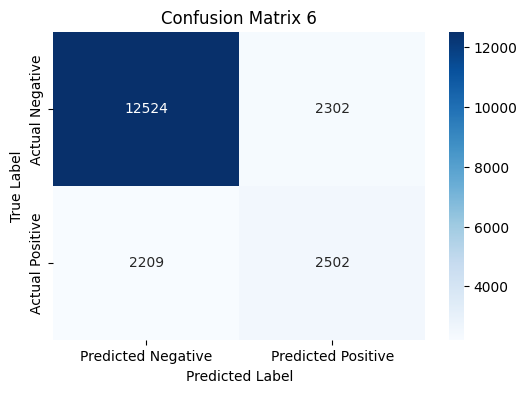

Step for featurs 7
accuracy is 0.7730460152531095


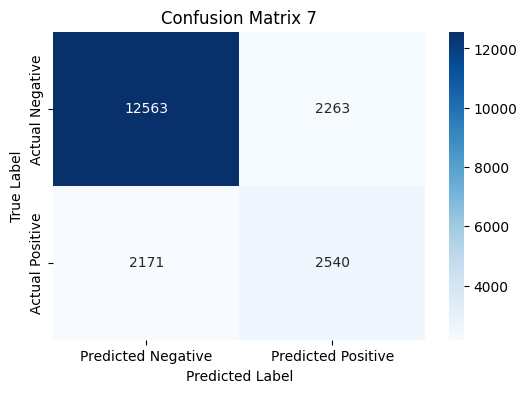

Step for featurs 8
accuracy is 0.7716640221118902


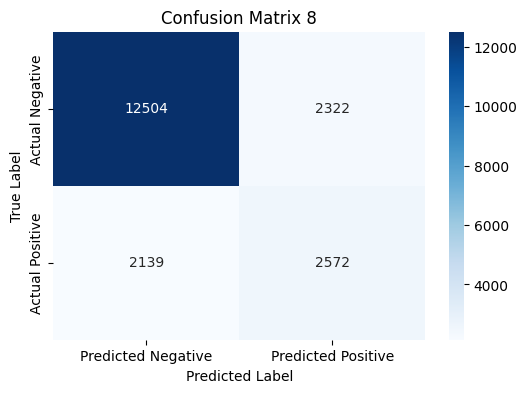

Step for featurs 9
accuracy is 0.7720223166299841


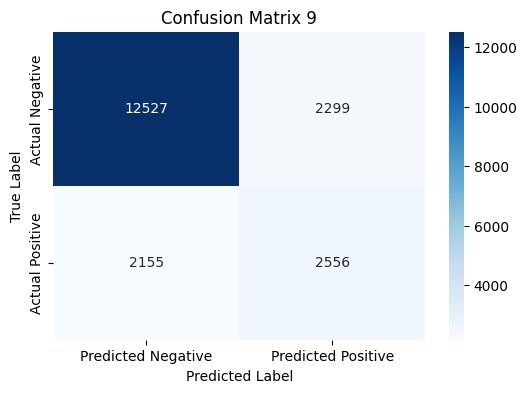

Step for featurs 10
accuracy is 0.770282028970671


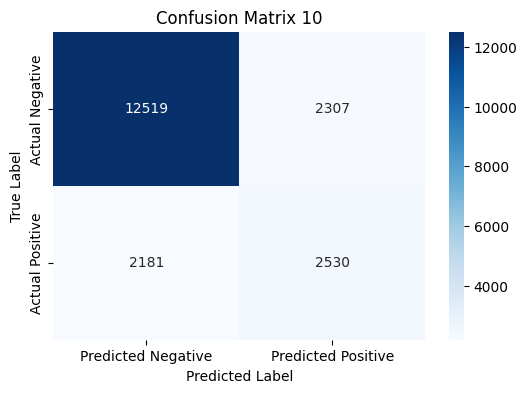

Step for featurs 11
accuracy is 0.7718687618365153


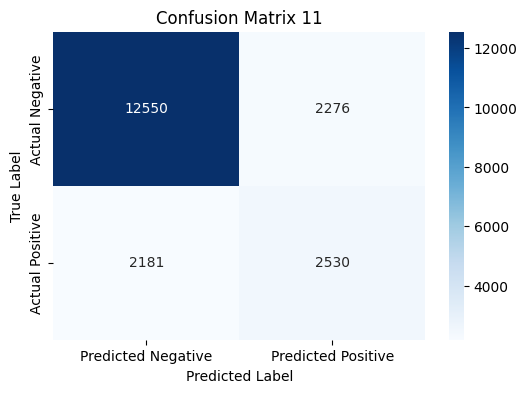

Step for featurs 12
accuracy is 0.7714592823872652


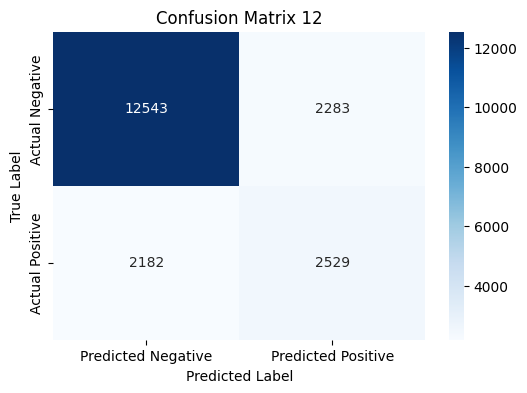

Step for featurs 13
accuracy is 0.7715616522495777


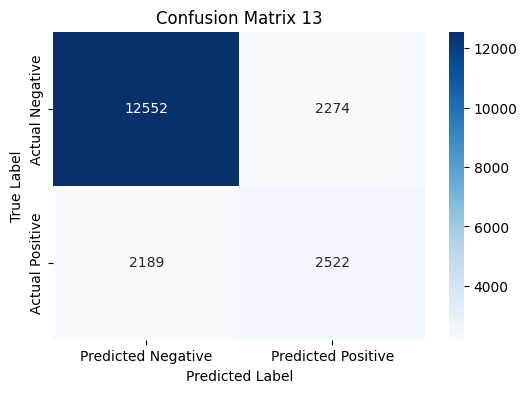

========== DT Ends ==========
========== KNN Starts ==========
Step for featurs 1
accuracy is 0.7219122690279982


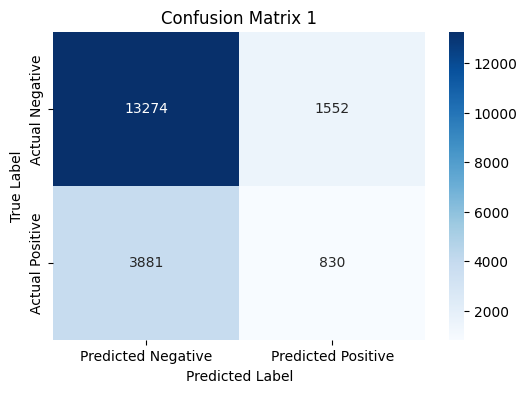

Step for featurs 2
accuracy is 0.769309515278702


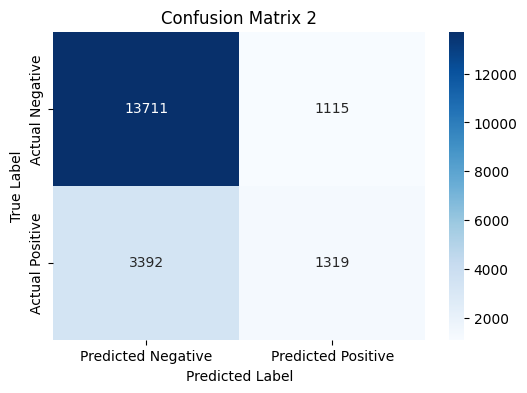

Step for featurs 3
accuracy is 0.7754005220862978


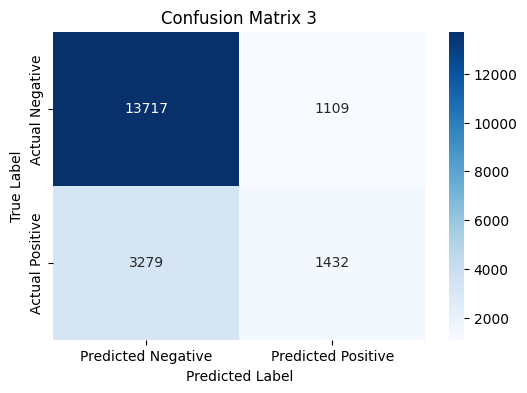

Step for featurs 4
accuracy is 0.777550289194861


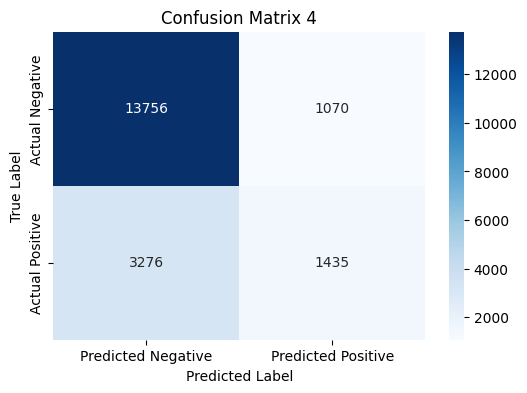

Step for featurs 5
accuracy is 0.7776014741260173


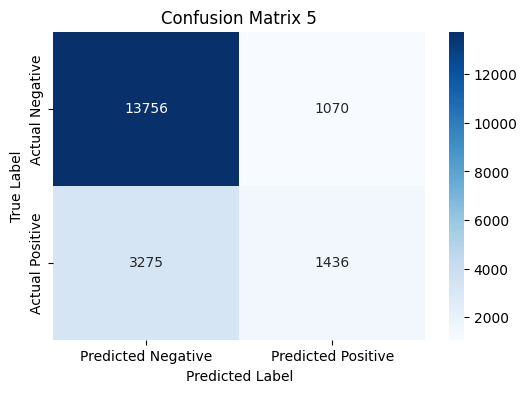

Step for featurs 6
accuracy is 0.7776014741260173


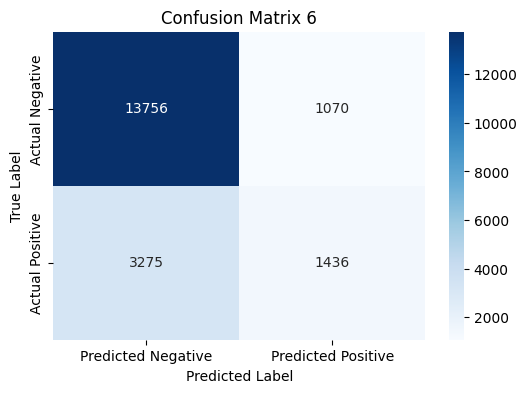

Step for featurs 7
accuracy is 0.777550289194861


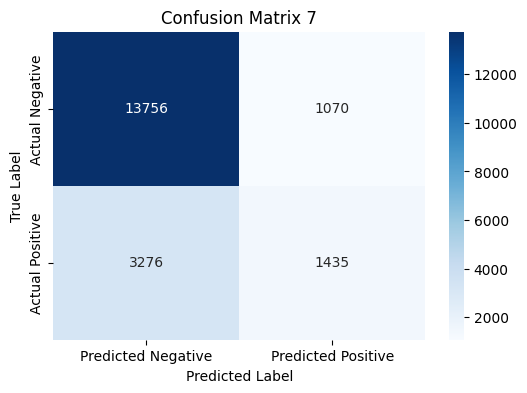

Step for featurs 8
accuracy is 0.777550289194861


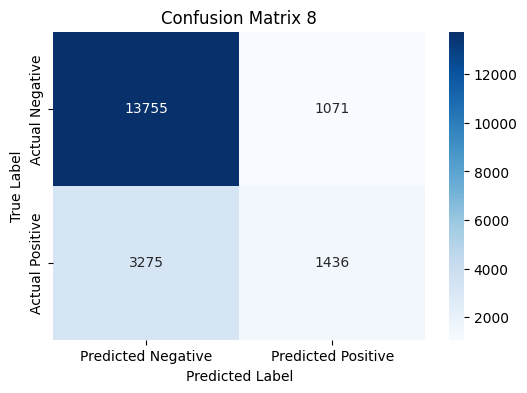

Step for featurs 9
accuracy is 0.7776526590571736


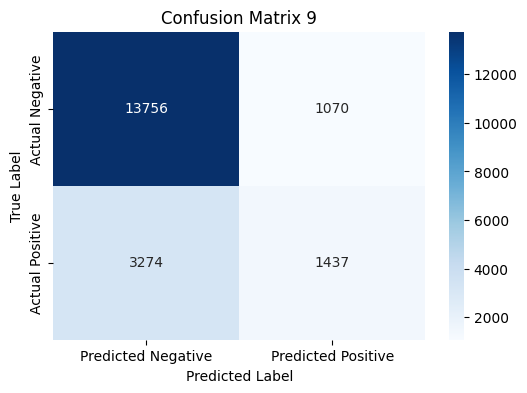

Step for featurs 10
accuracy is 0.7776526590571736


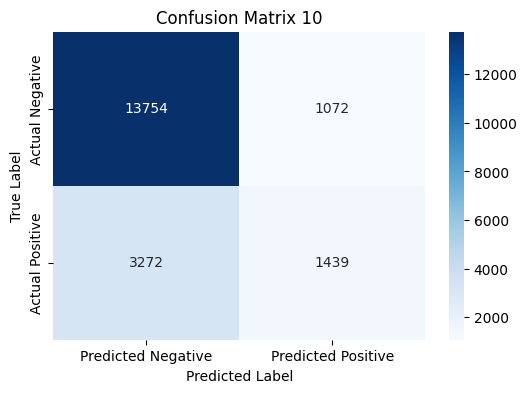

Step for featurs 11
accuracy is 0.7776526590571736


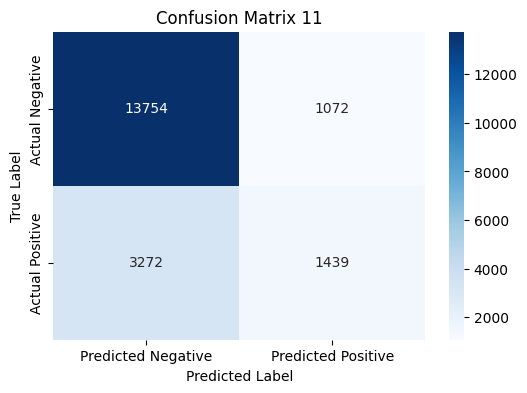

Step for featurs 12
accuracy is 0.7776526590571736


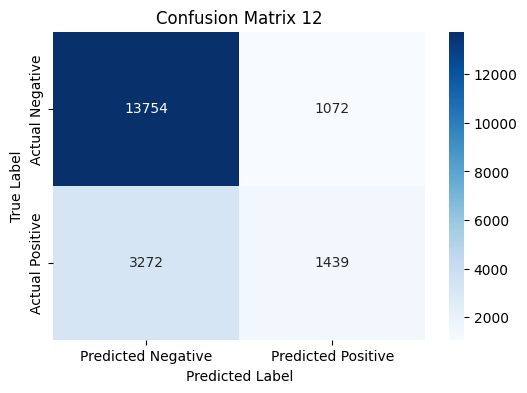

Step for featurs 13
accuracy is 0.7776526590571736


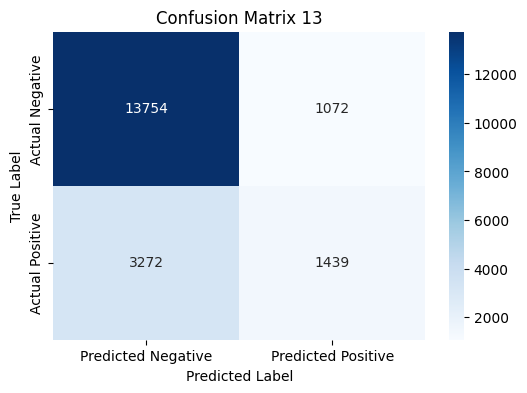

========== KNN Ends ==========


In [ ]:
print("========== DT Starts ==========")
selected_features_DT, performance_DT, FP_train_time_DT, FP_test_time_DT = forward_pass_with_DT([], [])
print("========== DT Ends ==========")
print("========== KNN Starts ==========")
selected_features_KNN, performance_KNN, FP_train_time_KNN, FP_test_time_KNN = forward_pass_with_knn([], [])
print("========== KNN Ends ==========")

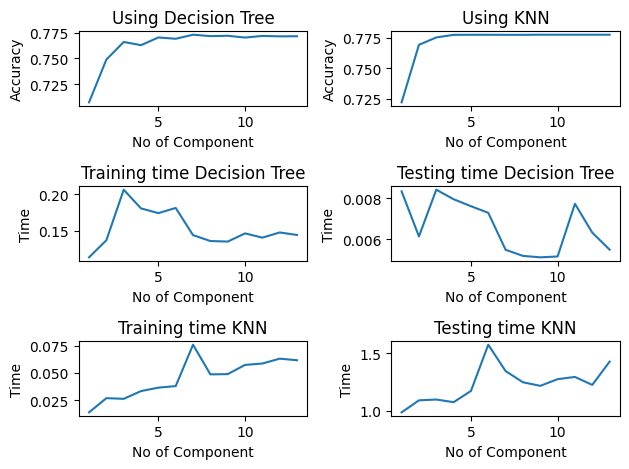

In [ ]:
# Graphs for Froward Search
fig, axs = plt.subplots(3, 2)

axs[0, 0].plot(selected_features_DT, performance_DT)
axs[0, 0].set_xlabel("No of Component")
axs[0, 0].set_ylabel("Accuracy")
axs[0, 0].set_title("Using Decision Tree")

axs[0, 1].plot(selected_features_KNN, performance_KNN)
axs[0, 1].set_xlabel("No of Component")
axs[0, 1].set_ylabel("Accuracy")
axs[0, 1].set_title("Using KNN")

axs[1, 0].plot(no_of_components, FP_train_time_DT)
axs[1, 0].set_xlabel("No of Component")
axs[1, 0].set_ylabel("Time")
axs[1, 0].set_title("Training time Decision Tree")

axs[1, 1].plot(no_of_components, FP_test_time_DT)
axs[1, 1].set_xlabel("No of Component")
axs[1, 1].set_ylabel("Time")
axs[1, 1].set_title("Testing time Decision Tree")

axs[2, 0].plot(no_of_components, FP_train_time_KNN)
axs[2, 0].set_xlabel("No of Component")
axs[2, 0].set_ylabel("Time")
axs[2, 0].set_title("Training time KNN")

axs[2, 1].plot(no_of_components, FP_test_time_KNN)
axs[2, 1].set_xlabel("No of Component")
axs[2, 1].set_ylabel("Time")
axs[2, 1].set_title("Testing time KNN")

plt.tight_layout()
plt.show()